# GRIP: The Sparks Foundation

# Data Science and Business Analytics Internship

## Author:Kapulapalli Venkateswarlu

## Tast 1: Prediction Using Supervised Machine Learning

In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.We use the data available http://bit.ly/w-data

### Importing Modules:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import seaborn as sns

### Reading and Preparing Data

In [17]:
data=pd.read_csv('http://bit.ly/w-data')
print('shape of the dataset is: ',data.shape)
data.head()

shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [19]:
#checking for any missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [20]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


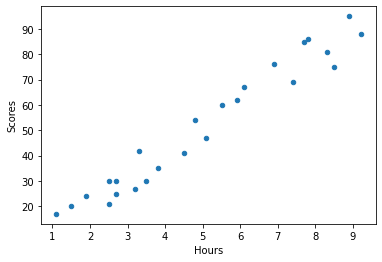

In [22]:
data.plot(kind='scatter', x='Hours', y='Scores')
plot.show()

In [23]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [24]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


## Linear Regression

In [25]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1:].values

In [26]:
x


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [27]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [28]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

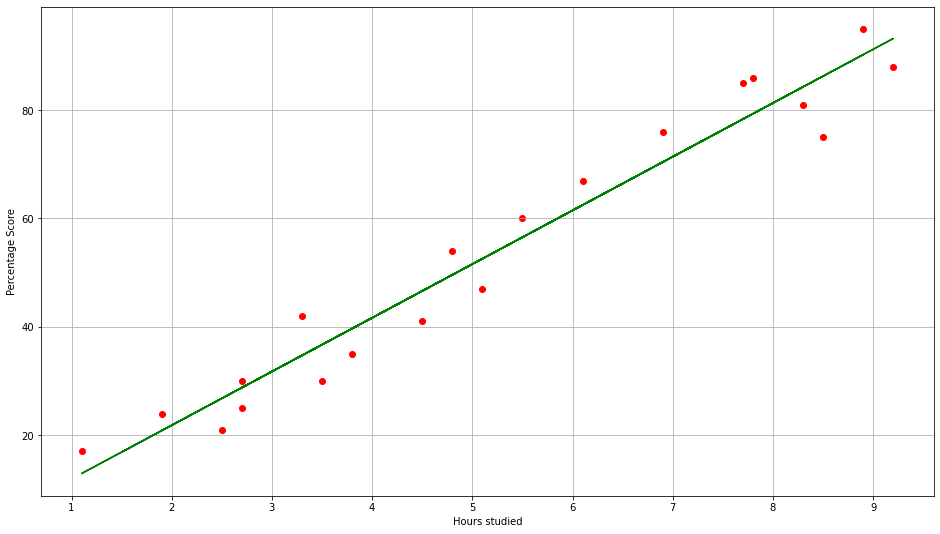

In [30]:
line=model.coef_*x + model.intercept_
# plotting for the training data
plot.rcParams['figure.figsize']=[16,9]
plot.scatter(x_train,y_train,color='red')
plot.plot(x,line,color='green')
plot.xlabel('Hours studied')
plot.ylabel('Percentage Score')
plot.grid()
plot.show()

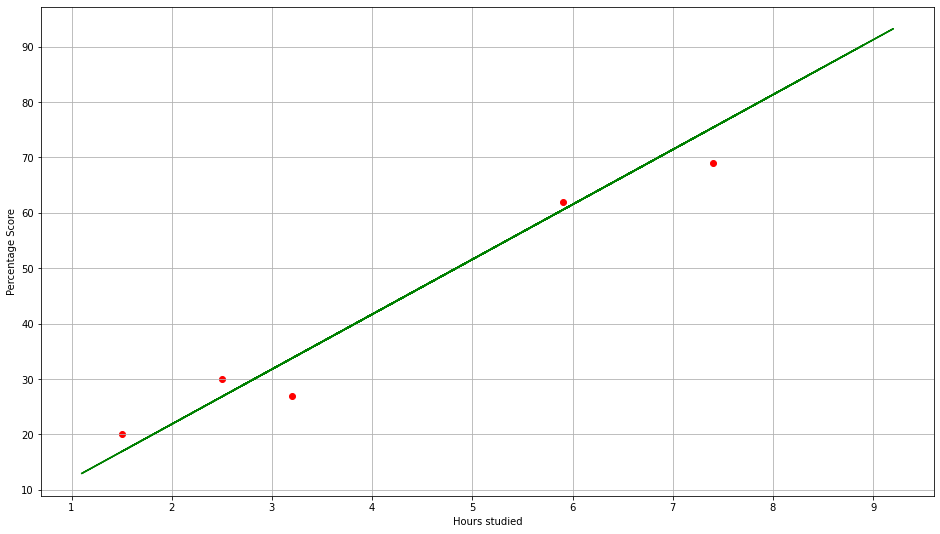

In [31]:
# plotting for the testing data
plot.rcParams['figure.figsize']=[16,9]
plot.scatter(x_test,y_test,color='red')
plot.plot(x,line,color='green')
plot.xlabel('Hours studied')
plot.ylabel('Percentage Score')
plot.grid()
plot.show()

In [32]:
print(x_test)#testing data-In Hours
y_pred=model.predict(x_test)# predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
# camparing Actual vs Predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [34]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [35]:
# camparing Actual vs Predicted
comp=pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


### what would be the predicted score if a student for 9.25 hours/day?

In [36]:
# testing with your own data
hours=9.25
own_pred=model.predict([[hours]])
print("the predicted score if a pearson studies for", hours,"hours is",own_pred[0])

the predicted score if a pearson studies for 9.25 hours is [93.69173249]


### Model Evaluation:

In [37]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score: ",r2_score(y_test,y_pred))


Mean Absolute Error:  4.183859899002975
R2 Score:  0.9454906892105356
